In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(word) for word in words)

2

In [5]:
max(len(word) for word in words)

15

In [15]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1, ch2)

In [18]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [19]:
import torch

In [41]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [42]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
stoi
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [43]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

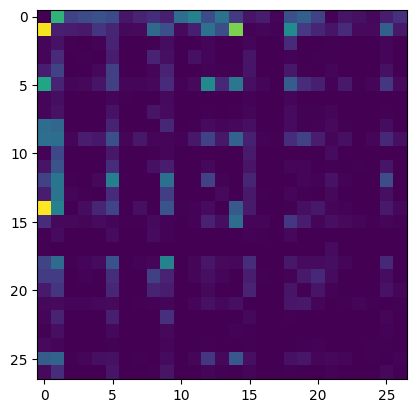

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [72]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [73]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [81]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'j'

In [109]:
P = N.float()
P = P.sum(dim=1, keepdim=True)
P.shape

torch.Size([27, 1])

In [110]:
# 27, 27
# 27, 1
#Look at Broadcasting rules 
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)

In [111]:
P[0].sum()

tensor(1.)

In [112]:
g = torch.Generator().manual_seed(2147483647)

for i in range(30):
    idx = 0
    out = []
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if idx == 0:
            break
        out.append(itos[idx])
    print(''.join(out))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush
dgossmitan
il
le
pann
that
janreli
isa
dyn
rijelumemahaunayaleva
cararr


In [211]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2} {prob:.4f} {log_prob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a 0.1376 -1.9835
an 0.1604 -1.8302
nd 0.0384 -3.2594
dr 0.0770 -2.5646
re 0.1334 -2.0143
ej 0.0027 -5.9004
jq 0.0003 -7.9817
q. 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [114]:
#create a training set of bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        print(f'{ch1}{ch2}')
        xs.append(idx1)
        ys.append(idx2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples', num)

.e
em
mm
ma
a.


In [115]:
xs

tensor([ 0,  5, 13, 13,  1])

In [116]:
ys

tensor([ 5, 13, 13,  1,  0])

In [117]:
import torch.nn.functional as F

In [121]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [122]:
xenc.shape

torch.Size([5, 27])

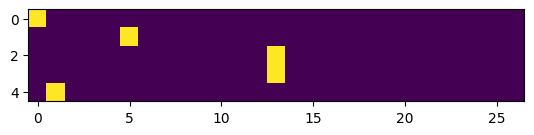

In [123]:
plt.imshow(xenc)

In [145]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [194]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdim=True)
#last two lines are softmax
loss = -probs[torch.arange(5), ys].log().mean()

In [195]:
loss.item()

0.39059680700302124

In [196]:
#backward pass
W.grad = None #zero grad
loss.backward()

In [197]:
W.data += -10 * W.grad

In [208]:
#create a training set of bigrams 
#dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        #print(f'{ch1}{ch2}')
        xs.append(idx1)
        ys.append(idx2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples', num)

#initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples 228146


In [213]:
for iter in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W #log-counts
    counts = logits.exp() # equivalent to N
    probs = counts / counts.sum(1, keepdim=True)
    #last two lines are softmax
    loss = -probs[torch.arange(num), ys].log().mean() + (0.01 * (W**2).mean())
    print(loss.item())
    
    #backward pass
    W.grad = None #zero grad
    loss.backward()

    #update
    W.data += -100 * W.grad

2.529874563217163
2.509695529937744
2.5098354816436768
2.5130438804626465
2.5293850898742676
2.5092499256134033
2.5095081329345703
2.5127148628234863
2.529048442840576
2.5089399814605713
2.5092759132385254
2.5124597549438477
2.528787851333618
2.5087106227874756
2.5090932846069336
2.512251377105713
2.5285732746124268
2.5085225105285645
2.5089385509490967
2.5120739936828613
2.5283901691436768
2.5083611011505127
2.5088019371032715
2.5119197368621826
2.5282304286956787
2.508219003677368
2.5086798667907715
2.511782646179199
2.5280890464782715
2.5080931186676025
2.508570909500122
2.511662006378174
2.527965784072876
2.507979393005371
2.508469820022583
2.511552333831787
2.527855396270752
2.5078768730163574
2.5083775520324707
2.511453866958618
2.5277559757232666
2.5077831745147705
2.5082921981811523
2.511364221572876
2.527667760848999
2.5076990127563477
2.508213758468628
2.511282205581665
2.527585506439209
2.5076212882995605
2.5081429481506348
2.511206865310669
2.527510404586792
2.5075500011444

In [214]:
#sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    idx = 0
    out = []
    while True:
        xenc = F.one_hot(torch.tensor([idx]), num_classes=27).float()
        logits = xenc @ W # predit log counts
        counts = logits.exp() # counts
        p = counts / counts.sum(1, keepdim=True)
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if idx == 0:
            break
        out.append(itos[idx])
    print(''.join(out))

junide
janasah
p
cony
ain
